目标：The task is to predict the value of target column in the test set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')
df_submission = pd.read_csv('./sample_submission.csv')

In [2]:
df_train.describe()
df_test.describe()

NameError: name 'df_train' is not defined

In [36]:
df_train
df_test

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
5,train_5,0,11.4763,-2.3182,12.6080,8.6264,10.9621,3.5609,4.5322,15.2255,...,-6.3068,6.6025,5.2912,0.4403,14.9452,1.0314,-3.6241,9.7670,12.5809,-4.7602
6,train_6,0,11.8091,-0.0832,9.3494,4.2916,11.1355,-8.0198,6.1961,12.0771,...,8.7830,6.4521,3.5325,0.1777,18.3314,0.5845,9.1104,9.1143,10.8869,-3.2097
7,train_7,0,13.5580,-7.9881,13.8776,7.5985,8.6543,0.8310,5.6890,22.3262,...,13.1700,6.5491,3.9906,5.8061,23.1407,-0.3776,4.2178,9.4237,8.6624,3.4806
8,train_8,0,16.1071,2.4426,13.9307,5.6327,8.8014,6.1630,4.4514,10.1854,...,1.4298,14.7510,1.6395,1.4181,14.8370,-1.9940,-1.0733,8.1975,19.5114,4.8453
9,train_9,0,12.5088,1.9743,8.8960,5.4508,13.6043,-16.2859,6.0637,16.8410,...,0.5543,6.3160,1.0371,3.6885,14.8344,0.4467,14.1287,7.9133,16.2375,14.2514


,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846
5,test_5,5.9862,-2.2913,8.6058,7.0685,14.2465,-8.6761,4.2467,14.7632,1.8790,...,-2.1115,7.1178,-0.4249,8.8781,14.9438,-2.2151,-6.0233,9.8117,17.1127,10.8240
6,test_6,8.4624,-6.1065,7.3603,8.2627,12.0104,-7.2073,4.1670,13.0809,-4.3004,...,12.3609,6.8661,4.0971,8.8484,17.5010,0.0295,7.7443,9.1509,18.4736,5.1499
7,test_7,17.3035,-2.4212,13.3989,8.3998,11.0777,9.6449,5.9596,17.8477,-4.8068,...,4.4676,4.4214,0.9303,1.4994,15.2648,-1.7931,6.5316,10.4855,23.4631,0.7283
8,test_8,6.9856,0.8402,13.7161,4.7749,8.6784,-13.7607,4.3386,14.5843,2.5883,...,-3.4657,7.8754,2.4698,-0.0362,16.7144,0.1221,-1.4328,9.9207,16.9865,-3.3304
9,test_9,10.3811,-6.9348,14.6690,9.0941,11.9058,-10.8018,3.4508,20.2816,-1.4112,...,1.8052,11.0723,0.8907,4.7680,15.1425,0.6075,-4.4447,9.5788,15.8146,9.3457


Target-0: 179902/200000-->0.89951
Target-1: 20098/200000-->0.10049


<Container object of 2 artists>

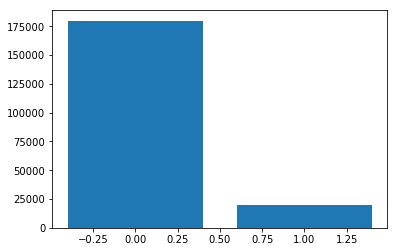

In [6]:
x=df_train['target'].unique()
y=df_train['target'].value_counts()
print('Target-0: {}/{}-->{}'.format(y[0],y[0]+y[1],y[0]/(y[0]+y[1])))
print('Target-1: {}/{}-->{}'.format(y[1],y[0]+y[1],y[1]/(y[0]+y[1])))
plt.bar(np.array([0,1]),y)
plt.show()


In [7]:
df_train.head()
df_test.head()
df_submission.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


,ID_code,target
0,test_0,0
1,test_1,0
2,test_2,0
3,test_3,0
4,test_4,0


(array([   95.,  1815., 12055., 34149., 47919., 45124., 35295., 14998.,
         6969.,  1581.]),
 array([ 0.4084 ,  2.39906,  4.38972,  6.38038,  8.37104, 10.3617 ,
        12.35236, 14.34302, 16.33368, 18.32434, 20.315  ]),
 <a list of 10 Patch objects>)

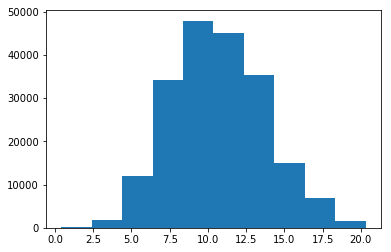

In [8]:
plt.hist(df_train['var_0'])
plt.show()

In [8]:
df_train.corr()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
target,1.000000,0.052390,0.050343,0.055870,0.011055,0.010915,0.030979,6.673085e-02,-0.003025,0.019584,...,0.055973,0.047114,-0.042858,-0.017709,-0.022838,0.028285,0.023608,-0.035303,-0.053000,0.025434
var_0,0.052390,1.000000,-0.000544,0.006573,0.003801,0.001326,0.003046,6.982549e-03,0.002429,0.004962,...,0.002752,0.000206,-0.005373,0.001616,-0.001514,0.002073,0.004386,-0.000753,-0.005776,0.003850
var_1,0.050343,-0.000544,1.000000,0.003980,0.000010,0.000303,-0.000902,3.257729e-03,0.001511,0.004098,...,0.006627,0.003621,-0.002604,0.001153,-0.002557,-0.000785,-0.000377,-0.004157,-0.004861,0.002287
var_2,0.055870,0.006573,0.003980,1.000000,0.001001,0.000723,0.001569,8.825211e-04,-0.000991,0.002648,...,0.000197,0.001285,-0.003400,0.000549,0.002104,-0.001070,0.003952,0.001078,-0.000877,0.003855
var_3,0.011055,0.003801,0.000010,0.001001,1.000000,-0.000322,0.003253,-7.743892e-04,0.002500,0.003553,...,0.000151,0.002445,-0.001530,-0.001699,-0.001054,0.001206,-0.002800,0.001164,-0.001651,0.000506
var_4,0.010915,0.001326,0.000303,0.000723,-0.000322,1.000000,-0.001368,4.882529e-05,0.004549,0.001194,...,0.001514,0.004357,0.003347,0.000813,-0.000068,0.003706,0.000513,-0.000046,-0.001821,-0.000786
var_5,0.030979,0.003046,-0.000902,0.001569,0.003253,-0.001368,1.000000,2.587780e-03,-0.000995,0.000147,...,0.001466,-0.000022,0.001116,-0.002237,-0.002543,-0.001274,0.002880,-0.000535,-0.000953,0.002767
var_6,0.066731,0.006983,0.003258,0.000883,-0.000774,0.000049,0.002588,1.000000e+00,-0.002548,-0.001188,...,0.000721,0.005604,-0.002563,0.002464,-0.001141,0.001244,0.005378,-0.003565,-0.003025,0.006096
var_7,-0.003025,0.002429,0.001511,-0.000991,0.002500,0.004549,-0.000995,-2.547746e-03,1.000000,0.000814,...,-0.000337,-0.003957,0.001733,0.003219,-0.000270,0.001854,0.001045,0.003466,0.000650,-0.001457
var_8,0.019584,0.004962,0.004098,0.002648,0.003553,0.001194,0.000147,-1.187995e-03,0.000814,1.000000,...,0.002923,-0.001151,-0.000429,0.001414,0.001313,0.001396,-0.003242,-0.004583,0.002950,0.000854


In [3]:
Y=df_train['target']
X=df_train.drop(['ID_code','target'], axis=1)
X.head()
Y.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [10]:

n_fold = 5
folds = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=36)


GBDT

In [5]:
def modelfit(alg, dtrain, dtest, predictors, performCV=True, printFeatureImportance=True, cv_flods=5):
    alg.fit(dftrain[predictors], true_label)
    
    # Predict training set
    dtrain_predictions = alg.predict(dtrain)
    dtrain_predprob = alg.predict_proba(dtrain)[:,1]
    
    # Perform cross-validation
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, dtrain, target, cv=cv_folds, scoring='roc_auc')
        
    # Print model report
    print("\nModel Report")
    print("Accuracy : %.4g"%metrics.accuracy_score(true_label, pred_label))
    print("AUC score (Train) : %f"%metrics.roc_auc_score(true_label, pred_label))
    
    if performCV:
        print("CV score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g"%(np.mean(cv_score), np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    # Print Feature Importance
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')
        plt.show()

In [4]:
trains, targets = X.values, Y.values
train_x, valid_x, train_y, valid_y = train_test_split(trains, targets, test_size=0.1, random_state=40)

In [5]:
def metrics_score(gbm):
    train_pred = gbm.predict(train_x)
    accu_train = metrics.accuracy_score(train_y, train_pred)
    auc_score = metrics.roc_auc_score(train_y, gbm.predict_proba(train_x)[:,1])
    print('train accuracy:',accu_train, 'train auc:',auc_score)
    valid_pred = gbm.predict(valid_x)
    accu_valid = metrics.accuracy_score(valid_y, valid_pred)
    auc_score = metrics.roc_auc_score(valid_y, gbm.predict_proba(valid_x)[:,1])
    print('valid accuracy:', accu_valid, 'valid auc:',auc_score)


In [16]:
gbm = GradientBoostingClassifier(learning_rate=0.0005,n_estimators=40000,max_depth=9,min_samples_split=550,
                                 min_samples_leaf=700,max_features=14,subsample=0.7,random_state=10)
gbm.fit(train_x,train_y)
metrics_score(gbm)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.0005, loss='deviance', max_depth=9,
              max_features=14, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=700, min_samples_split=550,
              min_weight_fraction_leaf=0.0, n_estimators=40000,
              n_iter_no_change=None, presort='auto', random_state=10,
              subsample=0.7, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

train accuracy: 0.9338777777777778 train auc: 0.9475773873830661
valid accuracy: 0.9208 valid auc: 0.8902764880308034


GBDT调参

In [17]:
test_data = df_test.drop(['ID_code'],axis=1)
test_data.head(10)

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,8.3442,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,7.4578,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,7.1437,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846
5,5.9862,-2.2913,8.6058,7.0685,14.2465,-8.6761,4.2467,14.7632,1.8790,7.2842,...,-2.1115,7.1178,-0.4249,8.8781,14.9438,-2.2151,-6.0233,9.8117,17.1127,10.8240
6,8.4624,-6.1065,7.3603,8.2627,12.0104,-7.2073,4.1670,13.0809,-4.3004,6.3181,...,12.3609,6.8661,4.0971,8.8484,17.5010,0.0295,7.7443,9.1509,18.4736,5.1499
7,17.3035,-2.4212,13.3989,8.3998,11.0777,9.6449,5.9596,17.8477,-4.8068,7.4643,...,4.4676,4.4214,0.9303,1.4994,15.2648,-1.7931,6.5316,10.4855,23.4631,0.7283
8,6.9856,0.8402,13.7161,4.7749,8.6784,-13.7607,4.3386,14.5843,2.5883,7.2215,...,-3.4657,7.8754,2.4698,-0.0362,16.7144,0.1221,-1.4328,9.9207,16.9865,-3.3304
9,10.3811,-6.9348,14.6690,9.0941,11.9058,-10.8018,3.4508,20.2816,-1.4112,6.7401,...,1.8052,11.0723,0.8907,4.7680,15.1425,0.6075,-4.4447,9.5788,15.8146,9.3457


In [29]:
df_submission['target'] = gbm.predict_proba(test_data.values)

In [32]:
subm=pd.read_csv('./sample_submission.csv')
subm.target=df_submission.target
df_submission.to_csv('submission.csv',index=False)

xgboost

In [42]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [39]:
#参数说明：  alg为定义的XGBClassifier分类器
#			dtrain为训练数据集
#			predictors为所有特征属性名称
#			target为类别名称


def modelfit(alg, dtrain, predictors, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    if useTrainCV:
        # 获取XGBClassifier分类器中xgboost类型的所有参数
        xgb_param = alg.get_xgb_params()
        xgbtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgbtrain, num_boost_round=alg.get_params()['n_estimators'],
                          nfold=cv_folds, metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])

    # Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target], eval_metric='auc')

    # Predict training set
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:, 1]

    # Print model report
    print("\nModel Report")
    print("Accuracy: %.4g" % (metrics.accuracy_score(dtrain[target].values, dtrain_predictions)))
    print("AUC Score (Train): %f" % (metrics.roc_auc_score(dtrain[target], dtrain_predprob)))
    return alg


In [40]:
target = 'target' # 标签值
predictors = [x for x in df_train.columns if x not in ['ID_code','target']] # 特征值矩阵


In [43]:
xgb1 = XGBClassifier(learning_rate=0.1,n_estimators=200,max_depth=5,
                    min_child_weight=10,gamma=0,subsample=0.8,colsample_bytree=0.8,
                    objective='binary:logistic',nthread=4,scale_pos_weight=1,seed=27)
alg0 = modelfit(xgb1, df_train,predictors)      


Model Report
Accuracy: 0.9266
AUC Score (Train): 0.936284


In [ ]:
pd.Series(alg0.feature_importances_).sort_values(ascending=False)

In [ ]:
plt.figure(figsize=(20,20))
feat_imp = pd.Series(alg0.feature_importances_).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel("Feature Importance Score")
plt.show()